# Which are the "best" zip codes for investing in real estate?

In [1]:
import pickle

In [10]:
with open('rankings.pickle') as f:
    vol_zips_crisis = pickle.load(f)
    zip_growth1118 = pickle.load(f)
    zip_growth9618 = pickle.load(f)
    vol_zips = pickle.load(f)      

### Top 10 most profitable zip codes from 2011 to 2018
- 10011: Chelsea, NYC
- 10014: Greenwich Village, NYC
- 10021: Upper East Side, NYC
- 33480: Palm Beach, FL
- 90210: Beverly Hills, CA
- 90402: Santa Monica, CA
- 94022: Los Altos, CA (outside San Jose)
- 94027: Atherton, CA
- 94123: San Francisco, CA
- 94301: Palo Alto, CA

### Most resiliant zips include:
- 10011: Chelsea, NY
- 10014: Greenwich Village, NY
- 10021: Upper East Side, NY
- 10128: North Upper East Side, NY
- 11215: Brooklyn, NY
- 11217: Boerum, Ny (North of Brooklyn)
- 11231: Carroll Gardens, NY
- 11932: Bridgehampton, NY
- 03215: Waterville Valley, NH
- 94608: Oakland, CA

### Most profitable zip codes from 1996 to 2018:
- 10011: Chelsea, NYC
- 10014: West Village, NYC
- 10021: Upper East Side, NYC
- 10128: North Uppder East Side, NYC
- 33480: Palm Beach, FL
- 90210: Beverly Hills, CA
- 94022: Los Altos, CA
- 94027: Atherton, CA
- 94123: San Francisco, CA
- 94301: Palo Alto, CA

## Best zip codes in terms of increased value and resiliancy appear to be:

### High value and resiliant:
- 10011: Chelsea, NYC
- 10014: Greenwich Village, NYC
- 10021: Upper East Side, NYC

### High value
- 90210: Beverly Hills, CA
- 94027: Atherton, CA
- 94022: Los Altos, CA (outside San Jose)
- 33480: Palm Beach, FL

### High resiliance
- 10128: North Upper East Side, NY
- 11215: Brooklyn, NY
- 11217: Boerum, Ny (North of Brooklyn)

## Let have a look at these zip codes

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
zill = pd.read_csv('../data/processed/zillow_cleaned_no_nulls.csv', index_col=0, dtype={'zip': 'object'})

In [35]:
zill.index = pd.to_datetime(zill.index)

In [18]:
best_zips = ['10011', '10014', '10021', '90210', '94027', '94022', '33480', '10128', '11215', '11217']

In [19]:
top_zips = zill.loc[(zill.zip.isin(best_zips))]

In [24]:
kill_cols = ['regionid', 'city', 'state', 'metro', 'countyname', 'sizerank']
top_zips_val = top_zips.drop(columns = kill_cols)

In [25]:
top_zips_val.head()

,zip,value
date,,
1996-04-01,10011,374300.0
1996-05-01,10011,265900.0
1996-06-01,10011,75600.0
1996-07-01,10011,130300.0
1996-08-01,10011,197900.0


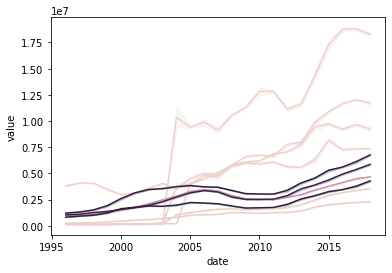

In [26]:
sns.lineplot(x = top_zips_val.index.year, y = 'value', data = top_zips_val, hue = 'zip', legend = False);

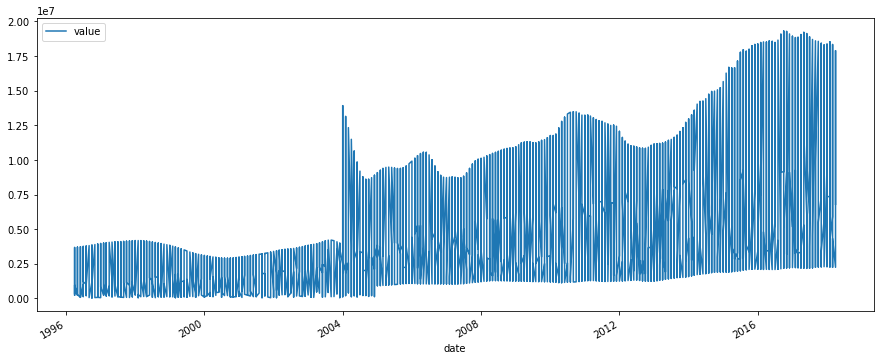

In [31]:
top_zips_val.plot(kind = 'line', figsize=(15, 6))
plt.show()

In [37]:
top_zips_val.index = pd.to_datetime(top_zips_val.index)

In [56]:
top_zips_val.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='date', length=2650, freq=None)

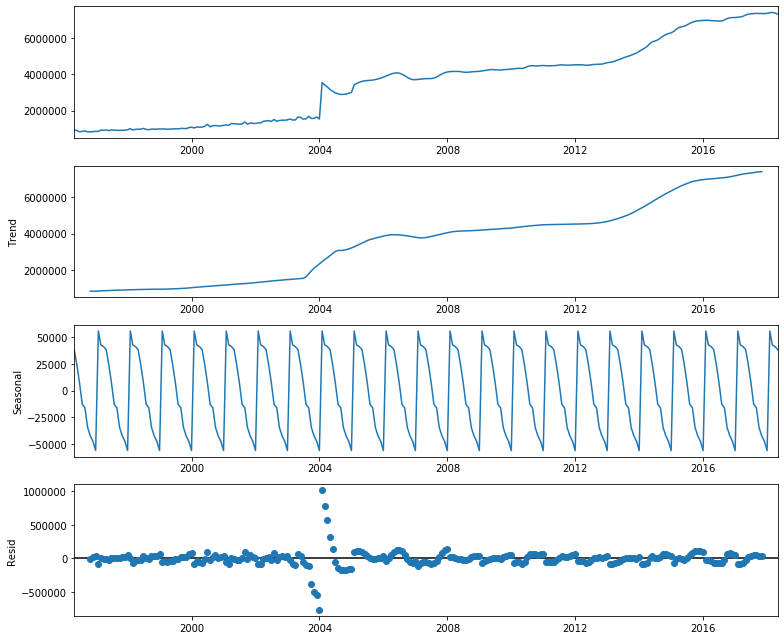

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(top_zips_val.resample('m').mean(), model='additive')
fig = decomposition.plot()
plt.show()

TypeError: can only concatenate str (not "float") to str

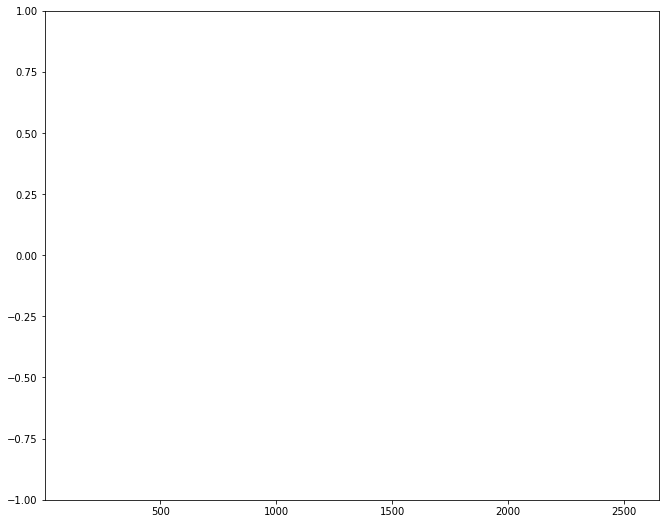

In [64]:
pd.plotting.autocorrelation_plot(top_zips_val);
plt.show()f